In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [52]:
# Get the data for training
train_file_path = 'train.csv'
dataset_df = pd.read_csv(train_file_path)
print('Train dataset shape: {}'.format(dataset_df.shape))

Train dataset shape: (1460, 81)


In [53]:
print(dataset_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [54]:
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

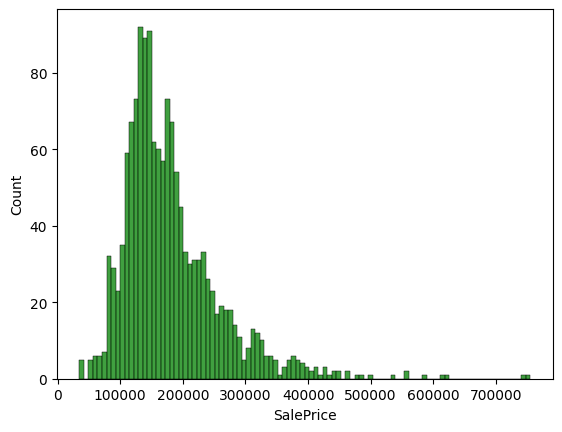

In [56]:
# Take a look at the property price distribution
sns.histplot(dataset_df['SalePrice'], color='g', bins = 100)

In [57]:
dataset_df = dataset_df.drop('Id', axis=1)

In [58]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [59]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [77]:
list(set(df_num.dtypes.tolist()))

[dtype('int64'), dtype('float64')]

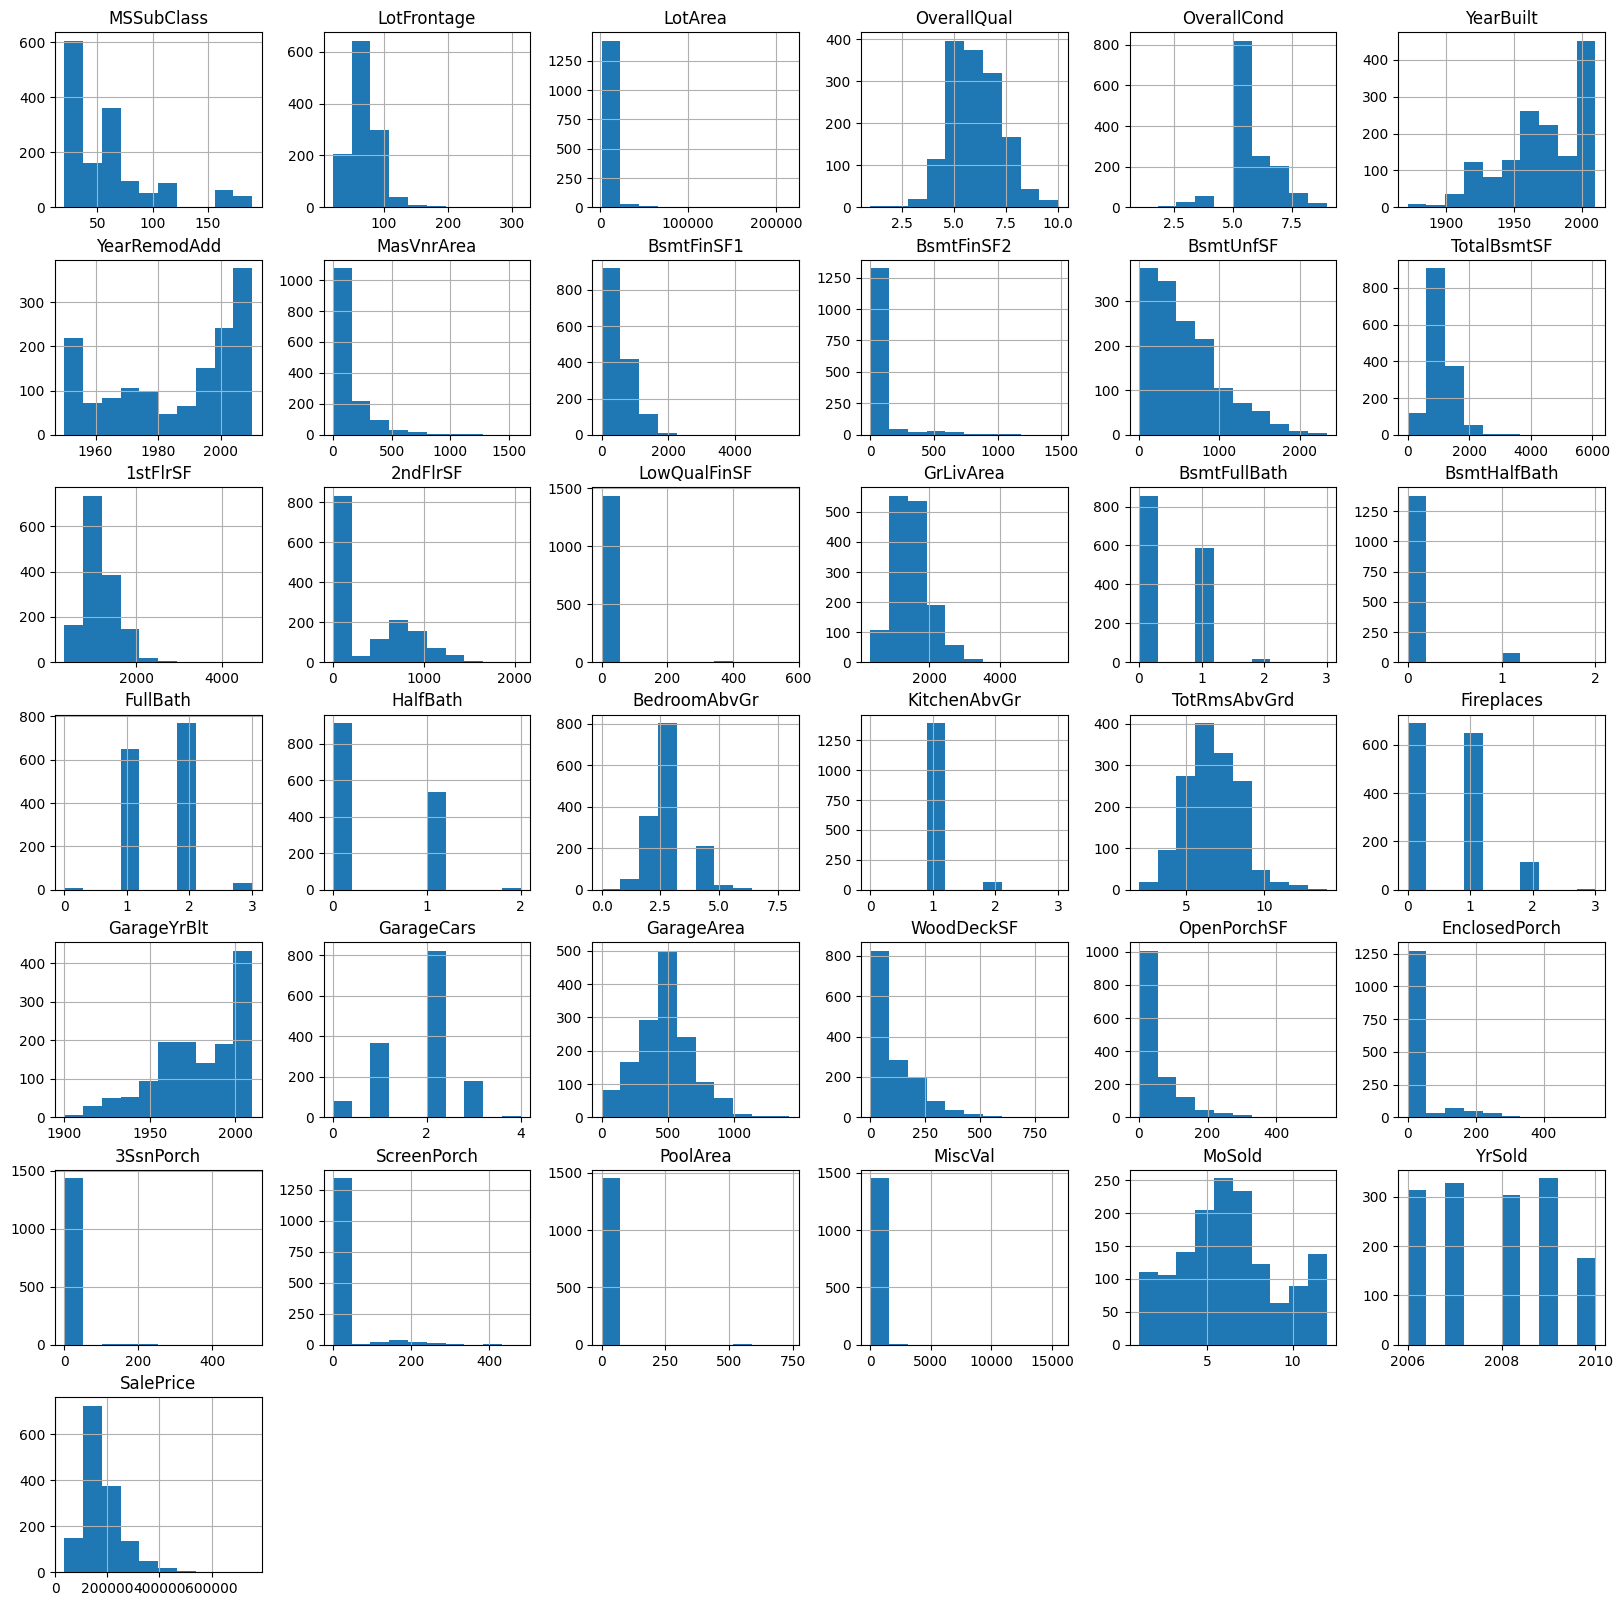

In [60]:
df_num.hist(figsize=(20, 20));

In [78]:
len(df_num)

1460

In [62]:
# commenting this out, as tfdf don't work, so I'll just switch to scikit
#def split_dataset(dataset, test_ratio = 0.3):
#    test_indices = np.random.rand(len(dataset)) < test_ratio
#    return dataset[~test_indices], dataset[test_indices]

In [63]:

# train_ds, valid_ds = split_dataset(dataset_df)
# print("Dataset splitting finished. {} items in training set, {} items in validation set.".format(len(train_ds), len(valid_ds)))

In [64]:
# Dealing with these imports one by one here, because they're buggy
# import tensorflow as tf

In [65]:
# print("TensorFlow v" + tf.__version__)

In [66]:
# Good

In [67]:
# now this one
# Of course it doesn't work, how dare I
# import tensorflow_decision_forests as tfdf

In [68]:
import sklearn

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [79]:
X = df_num.drop(columns=['SalePrice'])
y = df_num['SalePrice']

In [80]:
# make new sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [81]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# make predictions on the validation set
y_valid_pred = model.predict(X_valid)

In [88]:
accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.0091324200913242
